In [1]:
# Multiple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [18]:
# Load dataset.
dftrain = pd.read_csv('hospital_malaysia.csv') # training data



In [19]:
dftrain.head()

,Unnamed: 0,date,state,deaths_new,deaths_bid,deaths_new_dod,deaths_bid_dod,deaths_pvax,deaths_fvax,deaths_tat
0,NaN,17/3/2020,Johor,1,0,1,0,0,0,0
1,NaN,17/3/2020,Kedah,0,0,0,0,0,0,0
2,NaN,17/3/2020,Kelantan,0,0,0,0,0,0,0
3,NaN,17/3/2020,Melaka,0,0,0,0,0,0,0
4,NaN,17/3/2020,Negeri Sembilan,0,0,0,0,0,0,0


In [20]:
# Drop the state coulmn
dftrain=dftrain.drop('Unnamed: 0',axis=1)

In [21]:
dftrain.head()

,date,state,deaths_new,deaths_bid,deaths_new_dod,deaths_bid_dod,deaths_pvax,deaths_fvax,deaths_tat
0,17/3/2020,Johor,1,0,1,0,0,0,0
1,17/3/2020,Kedah,0,0,0,0,0,0,0
2,17/3/2020,Kelantan,0,0,0,0,0,0,0
3,17/3/2020,Melaka,0,0,0,0,0,0,0
4,17/3/2020,Negeri Sembilan,0,0,0,0,0,0,0


In [22]:
dftrain.isnull().sum()

date              0
state             0
deaths_new        0
deaths_bid        0
deaths_new_dod    0
deaths_bid_dod    0
deaths_pvax       0
deaths_fvax       0
deaths_tat        0
dtype: int64

In [23]:
dftrain.shape

(9280, 9)

In [24]:
dftrain.describe()

,deaths_new,deaths_bid,deaths_new_dod,deaths_bid_dod,deaths_pvax,deaths_fvax,deaths_tat
count,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000
mean,3.008728,0.608405,3.008728,0.608405,0.648707,0.293642,1.284375
std,11.755467,3.400312,11.403306,2.877777,3.533297,1.262029,5.571359
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,359.000000,84.000000,191.000000,63.000000,69.000000,17.000000,176.000000


Text(0.5, 0, '%deaths_new')

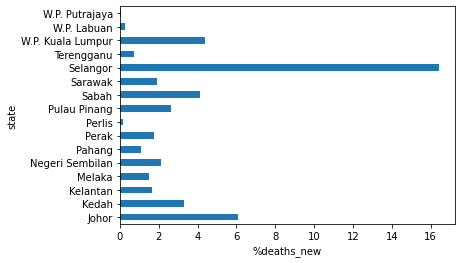

In [26]:
pd.concat([dftrain], axis=1).groupby('state').deaths_new.mean().plot(kind='barh').set_xlabel('%deaths_new')

Text(0.5, 0, '%deaths_bid')

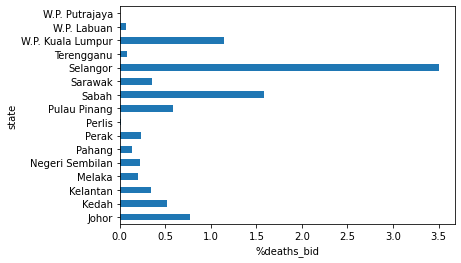

In [27]:
pd.concat([dftrain], axis=1).groupby('state').deaths_bid.mean().plot(kind='barh').set_xlabel('%deaths_bid')

Text(0.5, 0, '%deaths_new_dod')

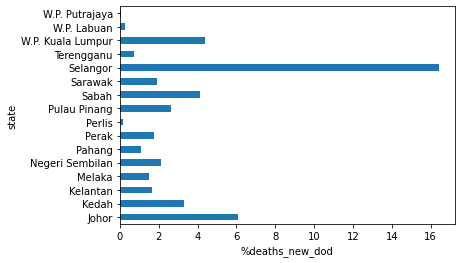

In [28]:
pd.concat([dftrain], axis=1).groupby('state').deaths_new_dod.mean().plot(kind='barh').set_xlabel('%deaths_new_dod')

Text(0.5, 0, '%deaths_bid_dod')

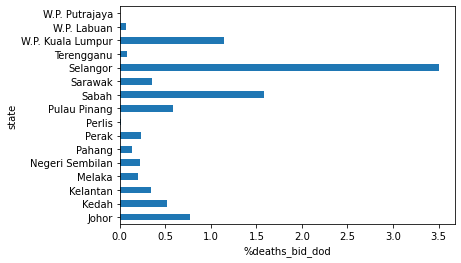

In [29]:
pd.concat([dftrain], axis=1).groupby('state').deaths_bid_dod.mean().plot(kind='barh').set_xlabel('%deaths_bid_dod')

Text(0.5, 0, '%deaths_pvax')

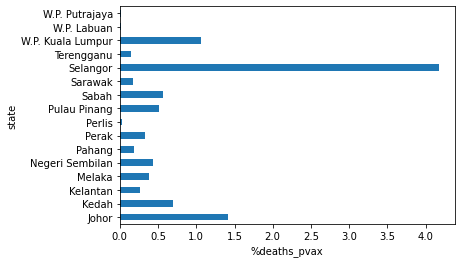

In [30]:
pd.concat([dftrain], axis=1).groupby('state').deaths_pvax.mean().plot(kind='barh').set_xlabel('%deaths_pvax')

Text(0.5, 0, '%deaths_fvax')

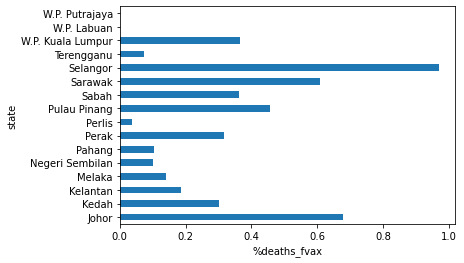

In [31]:
pd.concat([dftrain], axis=1).groupby('state').deaths_fvax.mean().plot(kind='barh').set_xlabel('%deaths_fvax')

Text(0.5, 0, '%deaths_tat')

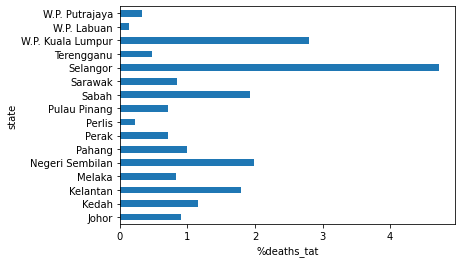

In [32]:
pd.concat([dftrain], axis=1).groupby('state').deaths_tat.mean().plot(kind='barh').set_xlabel('%deaths_tat')

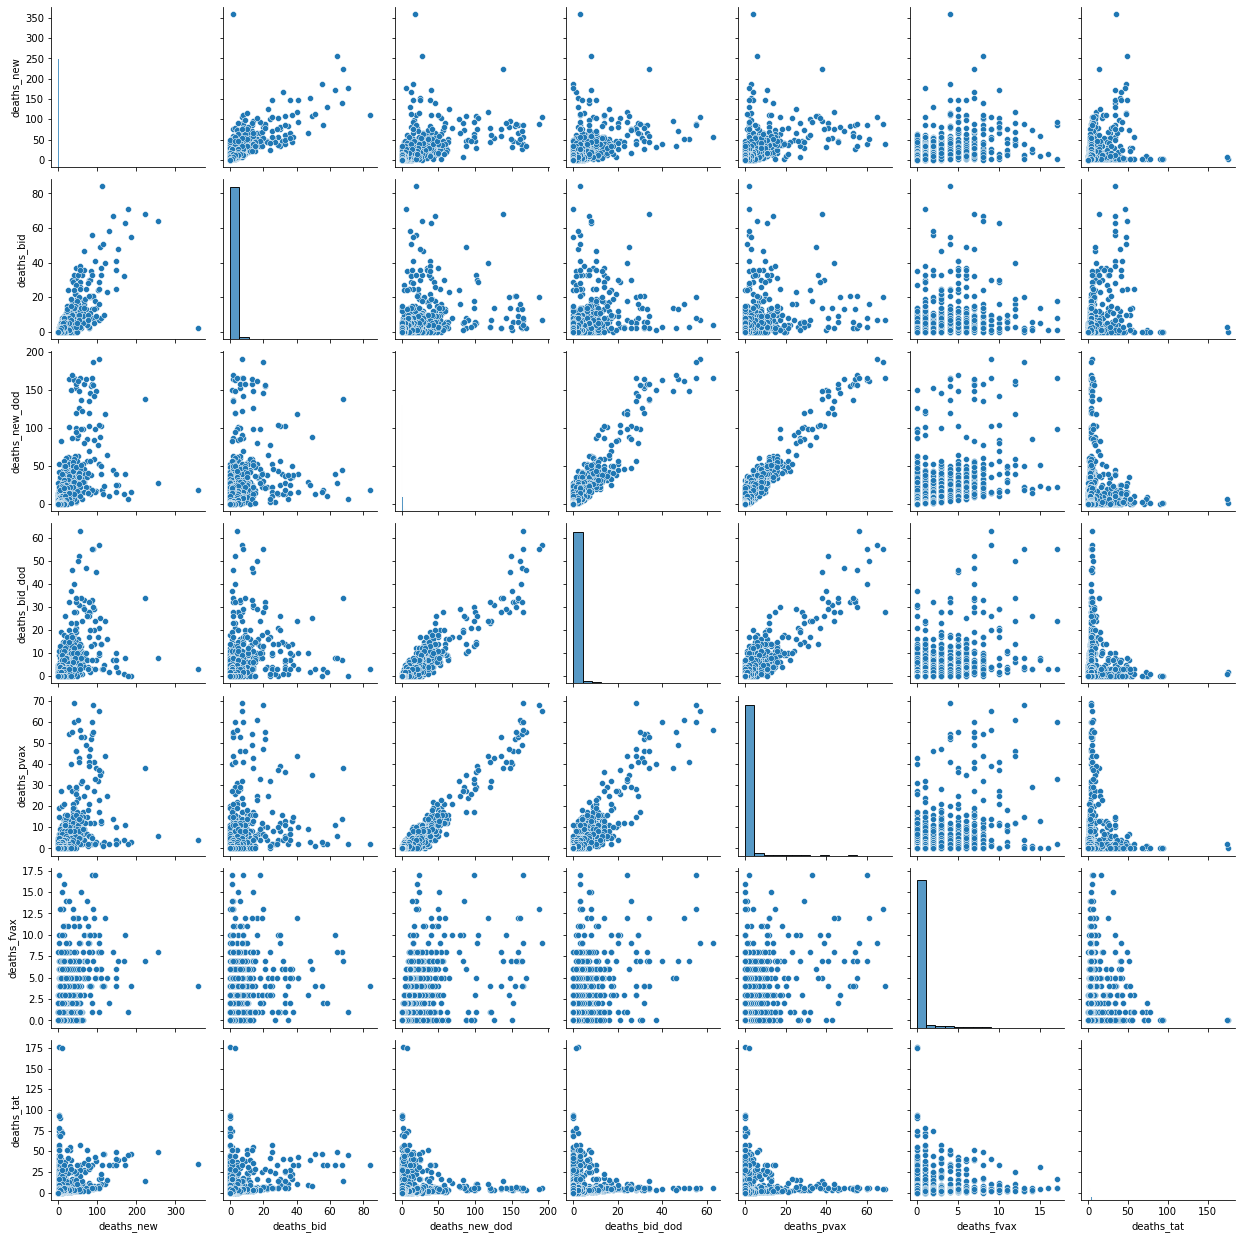

In [33]:
import seaborn as sns
sns.pairplot(dftrain)

In [35]:
dftrain.corr()

,deaths_new,deaths_bid,deaths_new_dod,deaths_bid_dod,deaths_pvax,deaths_fvax,deaths_tat
deaths_new,1.000000,0.794690,0.661413,0.601070,0.596573,0.597376,0.378055
deaths_bid,0.794690,1.000000,0.450118,0.435140,0.406531,0.468699,0.374614
deaths_new_dod,0.661413,0.450118,1.000000,0.928370,0.951059,0.612244,0.160628
deaths_bid_dod,0.601070,0.435140,0.928370,1.000000,0.894670,0.587009,0.147162
deaths_pvax,0.596573,0.406531,0.951059,0.894670,1.000000,0.539834,0.126646
deaths_fvax,0.597376,0.468699,0.612244,0.587009,0.539834,1.000000,0.228364
deaths_tat,0.378055,0.374614,0.160628,0.147162,0.126646,0.228364,1.000000


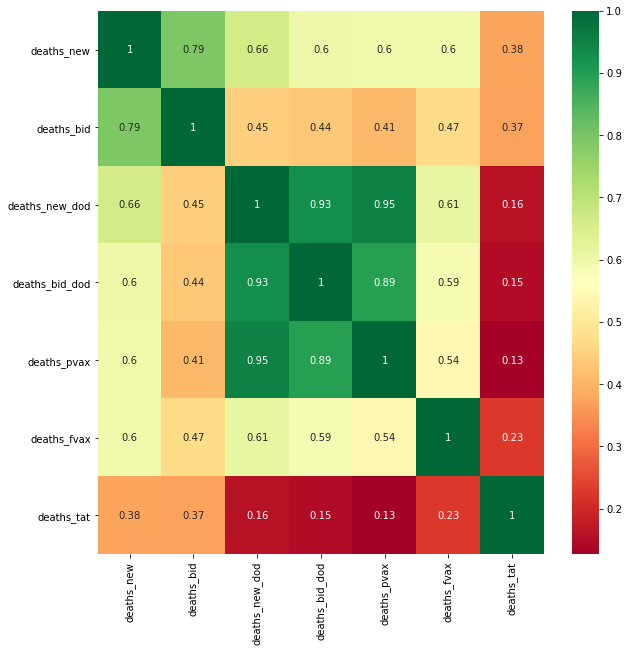

In [34]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = dftrain.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(dftrain[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [84]:
# Importing the dataset
X = dftrain.iloc[:, :-1] ## independent features
y = dftrain.iloc[:, 2]   ## dependent features

In [85]:
#Convert the column "State" into categorical columns

states=pd.get_dummies(X['state'],drop_first=True)

In [86]:
# Drop the state coulmn
X=X.drop('state',axis=1)

In [87]:
X.head()

,date,deaths_new,deaths_bid,deaths_new_dod,deaths_bid_dod,deaths_pvax,deaths_fvax
0,17/3/2020,1,0,1,0,0,0
1,17/3/2020,0,0,0,0,0,0
2,17/3/2020,0,0,0,0,0,0
3,17/3/2020,0,0,0,0,0,0
4,17/3/2020,0,0,0,0,0,0


In [88]:
# Drop the date coulmn
X=X.drop('date',axis=1)

In [89]:
X.head()

,deaths_new,deaths_bid,deaths_new_dod,deaths_bid_dod,deaths_pvax,deaths_fvax
0,1,0,1,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [90]:
# concat the dummy variables
X=pd.concat([X,states],axis=1)

In [91]:
X.head()

,deaths_new,deaths_bid,deaths_new_dod,deaths_bid_dod,deaths_pvax,deaths_fvax,Kedah,Kelantan,Melaka,Negeri Sembilan,...,Perak,Perlis,Pulau Pinang,Sabah,Sarawak,Selangor,Terengganu,W.P. Kuala Lumpur,W.P. Labuan,W.P. Putrajaya
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [92]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [93]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [94]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [95]:
prediction=regressor.predict(X_test)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='deaths_new', ylabel='Density'>

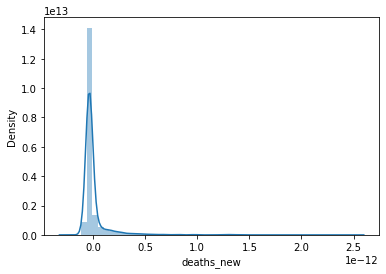

In [96]:
sns.distplot(y_test-prediction)

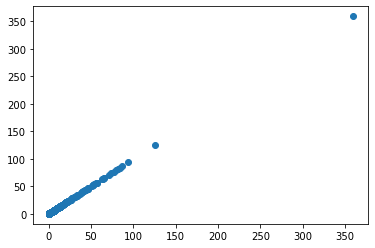

In [97]:
plt.scatter(y_test,prediction)

In [98]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

In [99]:
score.mean()

1.0